In [76]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
# Chargement des données
saumons = pd.read_csv("saumons.csv", sep=',')

# Vérifier les premières lignes du DataFrame
print(saumons.head())
print(saumons.columns)

  District  District ID  Report order Region                   Method    Year  \
0    Tweed        101.0           1.0   East   Fixed Engine: Retained  1952.0   
1    Tweed        101.0           1.0   East  Net and Coble: Retained  1952.0   
2    Tweed        101.0           1.0   East   Fixed Engine: Retained  1952.0   
3    Tweed        101.0           1.0   East  Net and Coble: Retained  1952.0   
4    Tweed        101.0           1.0   East   Fixed Engine: Retained  1952.0   

      Month  Month number  Wild MSW number  Wild MSW weight (kg)  ...  \
0  February           2.0            107.0                 400.5  ...   
1  February           2.0           6606.0               24856.9  ...   
2     March           3.0            185.0                 703.1  ...   
3     March           3.0           7008.0               26151.9  ...   
4     April           4.0            484.0                1912.3  ...   

   Wild 1SW weight (kg)  Sea trout number  Sea trout weight (kg)  \
0     

Pouvons-nous observer un lien de corrélation entre le mois de l'année et la quantité de Finnock, Wild 1SW et Sea Trout pêchés ? 

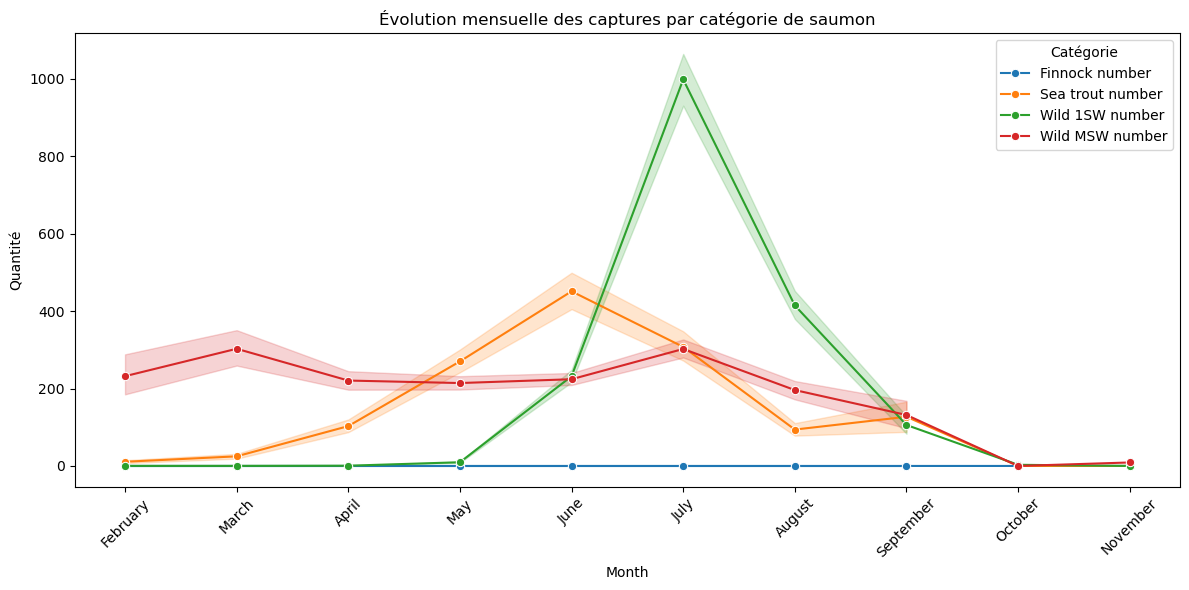

In [93]:
mois_ordre = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

saumons["Month"] = pd.Categorical(saumons["Month"], categories=mois_ordre, ordered=True)

saumons_long = saumons.melt(
    id_vars="Month",
    value_vars=["Finnock number", "Sea trout number", "Wild 1SW number", "Wild MSW number"],
    var_name="Catégorie",
    value_name="Quantité"
)

plt.figure(figsize=(12, 6))
sns.lineplot(data=saumons_long, x="Month", y="Quantité", hue="Catégorie", marker="o")
plt.title("Évolution mensuelle des captures par catégorie de saumon")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()